# Chasers Of The Lost Data

## Sobre la Divergencia de Kullback-Lieber

La divergencia KL es una pseudo-distancia (si la mido de `a` hacia `b` no necesariamente observaré el mismo valor que al medirla en sentido contrario) que permite calcular el grado de similitud entre dos distribuciones de datos.

En este caso, la utilizaremos para estimar la efectividad de la reconstrucción utilizando diversos métodos:

1. K-Nearest Neighbors
2. Soft Impute


In [0]:
import pandas as pd
import numpy as np
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
import pandas_profiling
#!easy_install fancyimpute
from scipy.stats import entropy
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

def eval_KL(df_true, df_reconstructed):
  print('Divergencia KL para cada par de columnas\n')
  divergencias = []
  for (col_name_1,col_1), (col_name_2, col_2) in zip(df_true[df_reconstructed.columns].iteritems(), df_reconstructed.iteritems()):
    # KL asume que estamos comparando 
    if col_1.min() < 0:
      col_1+=col_1.min()
    if col_2.min() < 0:
      col_2+=col_2.min()
    kl_divergence = entropy(col_1.values, col_2.values).round(3)
    divergencias.append(kl_divergence)
    print('{0} vs {1}: {2}'.format(col_name_1, 'reconstructed_'+col_name_2, entropy(col_1.values, kl_divergence)))
    return divergencias
    

def eval_mse(df_true, df_reconstructed):
  print('MSE para cada par de columnas\n')
  for (col_name_1,col_1), (col_name_2, col_2) in zip(df_true[df_reconstructed.columns].iteritems(), df_reconstructed.iteritems()):

    print('{0} vs {1}: {2}'.format(col_name_1, 'reconstructed_'+col_name_2, mean_squared_error(col_1.values, col_2.values).round(3)))


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
orbit = pd.read_csv('/content/drive/My Drive/Nasa Space Apps Challenge/Lost Data/Datasets anexos/orbits.csv')
impacts = pd.read_csv('/content/drive/My Drive/Nasa Space Apps Challenge/Lost Data/Datasets anexos/impacts.csv')

orbit_missing = pd.read_csv('/content/drive/My Drive/Nasa Space Apps Challenge/Lost Data/Datasets anexos/orbits_missing.csv').\
                            drop(columns=['Unnamed: 0'],axis = 1)
drop_ind = orbit[orbit['Asteroid Magnitude'].isna()].index
orbit.drop(index = drop_ind, inplace = True)
orbit_missing.drop(index = drop_ind, inplace = True)

impacts_missing = pd.read_csv('/content/drive/My Drive/Nasa Space Apps Challenge/Lost Data/Datasets anexos/impacts_missing.csv').\
                              drop(columns=['Unnamed: 0'],axis = 1)

orbit_missing = orbit_missing.select_dtypes(['float64', 'int64'])

# Orbit Dataset

Cantidad de Nulos en el dataset original

In [53]:
orbit.isna().sum()

Object Name                                 0
Object Classification                       0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
dtype: int64

Cantidad de datos nulos luego de generar bases corruptas:

In [54]:
orbit_missing.isna().sum()

Object Name                                 1529
Object Classification                       1580
Epoch (TDB)                                 1597
Orbit Axis (AU)                             1610
Orbit Eccentricity                          1497
Orbit Inclination (deg)                     1547
Perihelion Argument (deg)                   1523
Node Longitude (deg)                        1633
Mean Anomoly (deg)                          1570
Perihelion Distance (AU)                    1574
Aphelion Distance (AU)                      1530
Orbital Period (yr)                         1564
Minimum Orbit Intersection Distance (AU)    1607
Orbital Reference                           1543
Asteroid Magnitude                          1548
dtype: int64

In [55]:
orbit_missing.dtypes

Object Name                                  object
Object Classification                        object
Epoch (TDB)                                 float64
Orbit Axis (AU)                             float64
Orbit Eccentricity                          float64
Orbit Inclination (deg)                     float64
Perihelion Argument (deg)                   float64
Node Longitude (deg)                        float64
Mean Anomoly (deg)                          float64
Perihelion Distance (AU)                    float64
Aphelion Distance (AU)                      float64
Orbital Period (yr)                         float64
Minimum Orbit Intersection Distance (AU)    float64
Orbital Reference                           float64
Asteroid Magnitude                          float64
dtype: object

## K-Nearest Neighbors

In [76]:
n_k = int(np.floor(np.sqrt(orbit_missing.shape[0])))
orbit_knn = pd.DataFrame(KNN(k=n_k).fit_transform(orbit_missing), columns = orbit_missing.columns)

Imputing row 1/15634 with 0 missing, elapsed time: 53.331
Imputing row 101/15634 with 1 missing, elapsed time: 53.345
Imputing row 201/15634 with 2 missing, elapsed time: 53.356
Imputing row 301/15634 with 2 missing, elapsed time: 53.369
Imputing row 401/15634 with 1 missing, elapsed time: 53.383
Imputing row 501/15634 with 1 missing, elapsed time: 53.395
Imputing row 601/15634 with 4 missing, elapsed time: 53.407
Imputing row 701/15634 with 1 missing, elapsed time: 53.421
Imputing row 801/15634 with 0 missing, elapsed time: 53.433
Imputing row 901/15634 with 0 missing, elapsed time: 53.445
Imputing row 1001/15634 with 3 missing, elapsed time: 53.459
Imputing row 1101/15634 with 1 missing, elapsed time: 53.472
Imputing row 1201/15634 with 1 missing, elapsed time: 53.486
Imputing row 1301/15634 with 3 missing, elapsed time: 53.498
Imputing row 1401/15634 with 0 missing, elapsed time: 53.509
Imputing row 1501/15634 with 2 missing, elapsed time: 53.522
Imputing row 1601/15634 with 0 missi

In [57]:
eval_KL(orbit, orbit_knn)

Divergencia KL para cada par de columnas

Epoch (TDB) vs reconstructed_Epoch (TDB): 0.0
Orbit Axis (AU) vs reconstructed_Orbit Axis (AU): 0.006
Orbit Eccentricity vs reconstructed_Orbit Eccentricity: 0.007
Orbit Inclination (deg) vs reconstructed_Orbit Inclination (deg): 0.033
Perihelion Argument (deg) vs reconstructed_Perihelion Argument (deg): 0.021
Node Longitude (deg) vs reconstructed_Node Longitude (deg): 0.024
Mean Anomoly (deg) vs reconstructed_Mean Anomoly (deg): 0.026
Perihelion Distance (AU) vs reconstructed_Perihelion Distance (AU): 0.003
Aphelion Distance (AU) vs reconstructed_Aphelion Distance (AU): 0.006
Orbital Period (yr) vs reconstructed_Orbital Period (yr): 0.009
Minimum Orbit Intersection Distance (AU) vs reconstructed_Minimum Orbit Intersection Distance (AU): 0.039
Orbital Reference vs reconstructed_Orbital Reference: 0.048
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 0.001


In [60]:
eval_mse(orbit, orbit_knn)

MSE para cada par de columnas

Epoch (TDB) vs reconstructed_Epoch (TDB): 111597.425
Orbit Axis (AU) vs reconstructed_Orbit Axis (AU): 0.067
Orbit Eccentricity vs reconstructed_Orbit Eccentricity: 0.003
Orbit Inclination (deg) vs reconstructed_Orbit Inclination (deg): 12.031
Perihelion Argument (deg) vs reconstructed_Perihelion Argument (deg): 1162.705
Node Longitude (deg) vs reconstructed_Node Longitude (deg): 1258.726
Mean Anomoly (deg) vs reconstructed_Mean Anomoly (deg): 1342.018
Perihelion Distance (AU) vs reconstructed_Perihelion Distance (AU): 0.005
Aphelion Distance (AU) vs reconstructed_Aphelion Distance (AU): 0.087
Orbital Period (yr) vs reconstructed_Orbital Period (yr): 0.107
Minimum Orbit Intersection Distance (AU) vs reconstructed_Minimum Orbit Intersection Distance (AU): 0.001
Orbital Reference vs reconstructed_Orbital Reference: 85.751
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 0.68


Para casi todas las columnas se obtiene valores de la divergencia KL muy cercanos a 0, lo que puede indicar que el método en efecto fue el adecuado para este tipo de datos.

Solo se observa un valor `NaN` para la magnitud del asteroide.








---

## SoftImpute



In [79]:
orbit_softImpute = pd.DataFrame(SoftImpute().fit_transform(orbit_missing), columns = orbit_missing.columns)

[SoftImpute] Max Singular Value of X_init = 6797469.458297
[SoftImpute] Iter 1: observed MAE=114.445636 rank=1
[SoftImpute] Iter 2: observed MAE=114.262996 rank=1
[SoftImpute] Iter 3: observed MAE=114.263023 rank=1
[SoftImpute] Iter 4: observed MAE=114.263074 rank=1
[SoftImpute] Iter 5: observed MAE=114.262981 rank=1
[SoftImpute] Iter 6: observed MAE=114.262874 rank=1
[SoftImpute] Iter 7: observed MAE=114.262768 rank=1
[SoftImpute] Iter 8: observed MAE=114.262664 rank=1
[SoftImpute] Iter 9: observed MAE=114.262562 rank=1
[SoftImpute] Iter 10: observed MAE=114.262462 rank=1
[SoftImpute] Iter 11: observed MAE=114.262364 rank=1
[SoftImpute] Iter 12: observed MAE=114.262268 rank=1
[SoftImpute] Iter 13: observed MAE=114.262174 rank=1
[SoftImpute] Iter 14: observed MAE=114.262082 rank=1
[SoftImpute] Iter 15: observed MAE=114.261992 rank=1
[SoftImpute] Iter 16: observed MAE=114.261903 rank=1
[SoftImpute] Iter 17: observed MAE=114.261816 rank=1
[SoftImpute] Iter 18: observed MAE=114.261731 ran

In [62]:
eval_KL(orbit, orbit_softImpute)

Divergencia KL para cada par de columnas

Epoch (TDB) vs reconstructed_Epoch (TDB): 0.608
Orbit Axis (AU) vs reconstructed_Orbit Axis (AU): 0.07
Orbit Eccentricity vs reconstructed_Orbit Eccentricity: 0.064
Orbit Inclination (deg) vs reconstructed_Orbit Inclination (deg): 0.094
Perihelion Argument (deg) vs reconstructed_Perihelion Argument (deg): 0.087
Node Longitude (deg) vs reconstructed_Node Longitude (deg): 0.102
Mean Anomoly (deg) vs reconstructed_Mean Anomoly (deg): 0.098
Perihelion Distance (AU) vs reconstructed_Perihelion Distance (AU): 0.064
Aphelion Distance (AU) vs reconstructed_Aphelion Distance (AU): 0.068
Orbital Period (yr) vs reconstructed_Orbital Period (yr): 0.074
Minimum Orbit Intersection Distance (AU) vs reconstructed_Minimum Orbit Intersection Distance (AU): 0.116
Orbital Reference vs reconstructed_Orbital Reference: 0.12
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 0.063


In [63]:
eval_mse(orbit, orbit_softImpute)

MSE para cada par de columnas

Epoch (TDB) vs reconstructed_Epoch (TDB): 336086524.634
Orbit Axis (AU) vs reconstructed_Orbit Axis (AU): 0.107
Orbit Eccentricity vs reconstructed_Orbit Eccentricity: 0.005
Orbit Inclination (deg) vs reconstructed_Orbit Inclination (deg): 14.254
Perihelion Argument (deg) vs reconstructed_Perihelion Argument (deg): 1413.939
Node Longitude (deg) vs reconstructed_Node Longitude (deg): 1539.047
Mean Anomoly (deg) vs reconstructed_Mean Anomoly (deg): 1673.075
Perihelion Distance (AU) vs reconstructed_Perihelion Distance (AU): 0.014
Aphelion Distance (AU) vs reconstructed_Aphelion Distance (AU): 0.174
Orbital Period (yr) vs reconstructed_Orbital Period (yr): 0.196
Minimum Orbit Intersection Distance (AU) vs reconstructed_Minimum Orbit Intersection Distance (AU): 0.001
Orbital Reference vs reconstructed_Orbital Reference: 97.579
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 6.025


# Impact

In [0]:
impacts_missing = impacts_missing.select_dtypes(['float64', 'int64'])

In [38]:
impacts.isna().sum()

Object Name                      0
Period Start                     0
Period End                       0
Possible Impacts                 0
Cumulative Impact Probability    0
Asteroid Velocity                0
Asteroid Magnitude               0
Asteroid Diameter (km)           0
Cumulative Palermo Scale         0
Maximum Palermo Scale            0
Maximum Torino Scale             0
dtype: int64

In [39]:
impacts_missing.isna().sum()

Period Start                     117
Period End                       124
Possible Impacts                 119
Cumulative Impact Probability    145
Asteroid Velocity                130
Asteroid Magnitude               121
Asteroid Diameter (km)           123
Cumulative Palermo Scale         134
Maximum Palermo Scale            111
dtype: int64

In [40]:
impacts_missing.shape

(683, 9)

## KNN

In [41]:
n_k = int(np.floor(np.sqrt(impacts_missing.shape[0])))
impacts_knn = pd.DataFrame(KNN(k=n_k).fit_transform(impacts_missing), columns = impacts_missing.columns)

Imputing row 1/683 with 2 missing, elapsed time: 0.096
Imputing row 101/683 with 2 missing, elapsed time: 0.100
Imputing row 201/683 with 1 missing, elapsed time: 0.103
Imputing row 301/683 with 2 missing, elapsed time: 0.106
Imputing row 401/683 with 3 missing, elapsed time: 0.109
Imputing row 501/683 with 2 missing, elapsed time: 0.112
Imputing row 601/683 with 1 missing, elapsed time: 0.115


In [42]:
eval_KL(impacts, impacts_knn)

Divergencia KL para cada par de columnas

Period Start vs reconstructed_Period Start: 0.0
Period End vs reconstructed_Period End: 0.0
Possible Impacts vs reconstructed_Possible Impacts: 0.174
Cumulative Impact Probability vs reconstructed_Cumulative Impact Probability: 0.147
Asteroid Velocity vs reconstructed_Asteroid Velocity: 0.046
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 0.001
Asteroid Diameter (km) vs reconstructed_Asteroid Diameter (km): 0.449
Cumulative Palermo Scale vs reconstructed_Cumulative Palermo Scale: 0.001
Maximum Palermo Scale vs reconstructed_Maximum Palermo Scale: 0.001


In [43]:
eval_mse(impacts, impacts_knn)

MSE para cada par de columnas

Period Start vs reconstructed_Period Start: 173.354
Period End vs reconstructed_Period End: 70.978
Possible Impacts vs reconstructed_Possible Impacts: 2383.94
Cumulative Impact Probability vs reconstructed_Cumulative Impact Probability: 0.0
Asteroid Velocity vs reconstructed_Asteroid Velocity: 15.577
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 1.223
Asteroid Diameter (km) vs reconstructed_Asteroid Diameter (km): 0.011
Cumulative Palermo Scale vs reconstructed_Cumulative Palermo Scale: 121.508
Maximum Palermo Scale vs reconstructed_Maximum Palermo Scale: 121.713


## SoftImpure

In [44]:
impacts_softImpute = pd.DataFrame(SoftImpute().fit_transform(impacts_missing), columns = impacts_missing.columns)

[SoftImpute] Max Singular Value of X_init = 66618.400243
[SoftImpute] Iter 1: observed MAE=15.719474 rank=3
[SoftImpute] Iter 2: observed MAE=15.571917 rank=3
[SoftImpute] Iter 3: observed MAE=15.620426 rank=3
[SoftImpute] Iter 4: observed MAE=15.638225 rank=3
[SoftImpute] Iter 5: observed MAE=15.641101 rank=3
[SoftImpute] Iter 6: observed MAE=15.636469 rank=3
[SoftImpute] Iter 7: observed MAE=15.627826 rank=3
[SoftImpute] Iter 8: observed MAE=15.616524 rank=3
[SoftImpute] Iter 9: observed MAE=15.603445 rank=3
[SoftImpute] Iter 10: observed MAE=15.589345 rank=3
[SoftImpute] Iter 11: observed MAE=15.574633 rank=3
[SoftImpute] Iter 12: observed MAE=15.559418 rank=3
[SoftImpute] Iter 13: observed MAE=15.543895 rank=3
[SoftImpute] Iter 14: observed MAE=15.528344 rank=3
[SoftImpute] Iter 15: observed MAE=15.512756 rank=3
[SoftImpute] Iter 16: observed MAE=15.497117 rank=3
[SoftImpute] Iter 17: observed MAE=15.481523 rank=3
[SoftImpute] Iter 18: observed MAE=15.466044 rank=3
[SoftImpute] Ite

In [45]:
eval_KL(impacts, impacts_softImpute)

Divergencia KL para cada par de columnas

Period Start vs reconstructed_Period Start: 0.136
Period End vs reconstructed_Period End: 0.134
Possible Impacts vs reconstructed_Possible Impacts: inf
Cumulative Impact Probability vs reconstructed_Cumulative Impact Probability: 0.206
Asteroid Velocity vs reconstructed_Asteroid Velocity: 0.062
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 0.061
Asteroid Diameter (km) vs reconstructed_Asteroid Diameter (km): inf
Cumulative Palermo Scale vs reconstructed_Cumulative Palermo Scale: 0.002
Maximum Palermo Scale vs reconstructed_Maximum Palermo Scale: 0.001


In [46]:
eval_mse(impacts, impacts_softImpute)

MSE para cada par de columnas

Period Start vs reconstructed_Period Start: 117092.932
Period End vs reconstructed_Period End: 122412.058
Possible Impacts vs reconstructed_Possible Impacts: 1340.48
Cumulative Impact Probability vs reconstructed_Cumulative Impact Probability: 0.0
Asteroid Velocity vs reconstructed_Asteroid Velocity: 7.878
Asteroid Magnitude vs reconstructed_Asteroid Magnitude: 9.038
Asteroid Diameter (km) vs reconstructed_Asteroid Diameter (km): 0.011
Cumulative Palermo Scale vs reconstructed_Cumulative Palermo Scale: 119.511
Maximum Palermo Scale vs reconstructed_Maximum Palermo Scale: 120.841


# Análisis de las distribuciones reconstruidas
## Impacts
> ### KNN

In [0]:
def plot_hist(df_true, df_reconstructed):
  plt.rcParams['figure.figsize'] = (15,25)
  i = 1
  for (col_name_1,col_1), (col_name_2, col_2) in zip(df_true[df_reconstructed.columns].iteritems(), df_reconstructed.iteritems()):
    plt.subplot(df_true.shape[1],2,i)
    plt.title(col_name_1)
    sn.distplot(col_1, label = col_name_1)
    sn.distplot(col_2, label = 'reconstructed_'+col_name_2)
    plt.legend(loc=5, prop={'size': 8})
    plt.tight_layout()
    i+=1

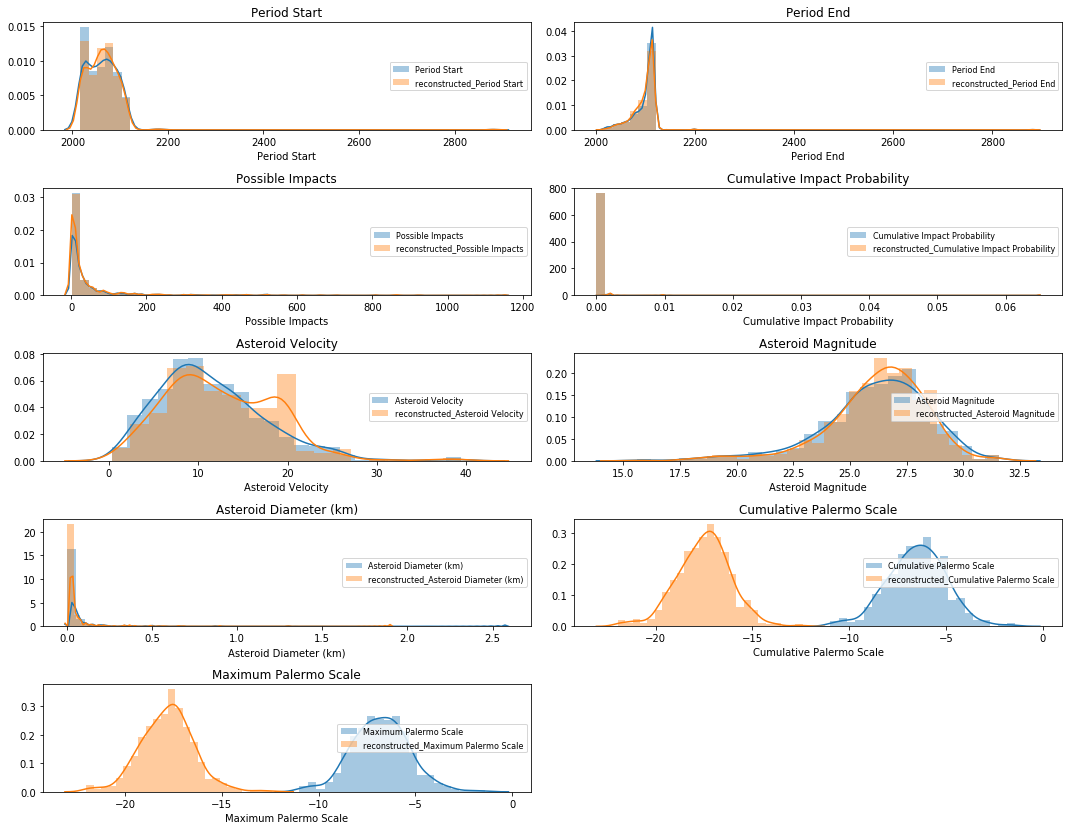

In [109]:
plot_hist(impacts, impacts_knn)

La divergencia KL es engañosa, valores cercanos a 0 indicarán que las distribuciones son similares, sin embargo, podemos ver claramente que para algunas variables las distribuciones reconstruidas presentan un desplazamiento, probablemente al sesgo de las características de los datos en la muestra sin datos perdidos.

Para varias distribuciones KNN fue capaz de encontrar excelentes resultados.

> ## SoftInputer

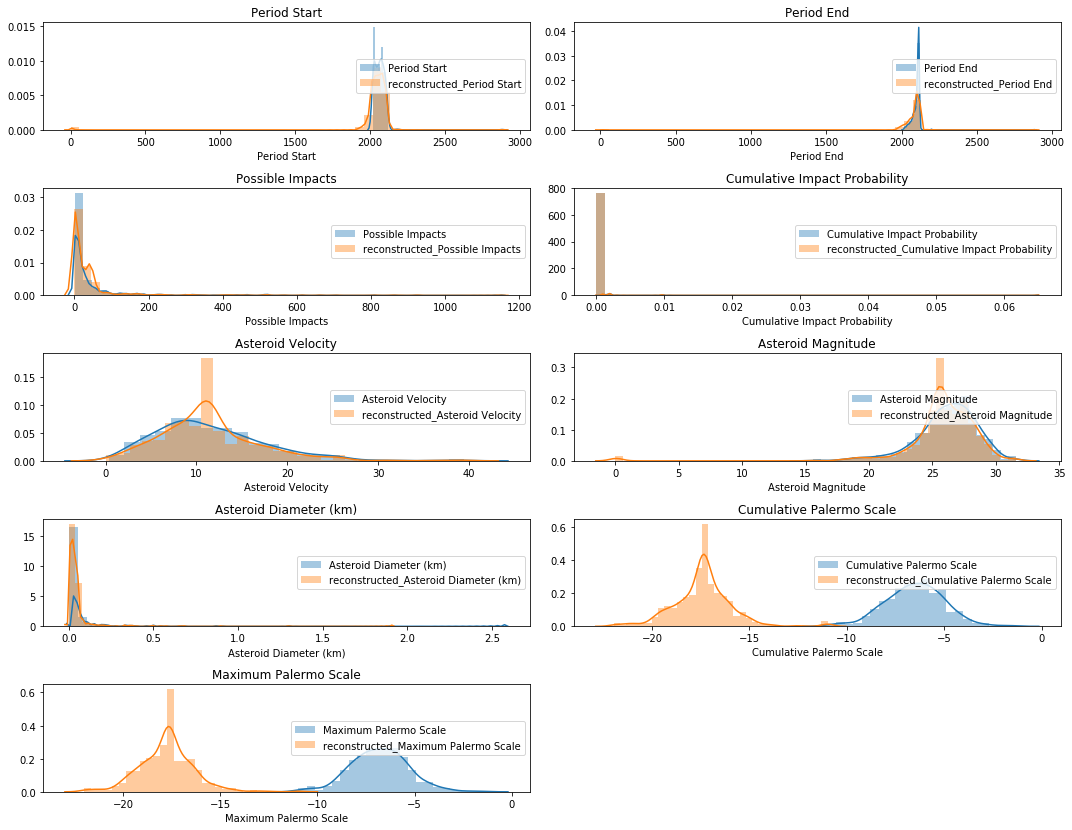

In [106]:
plot_hist(impacts, impacts_softImpute)

## Orbit

> ### KNN

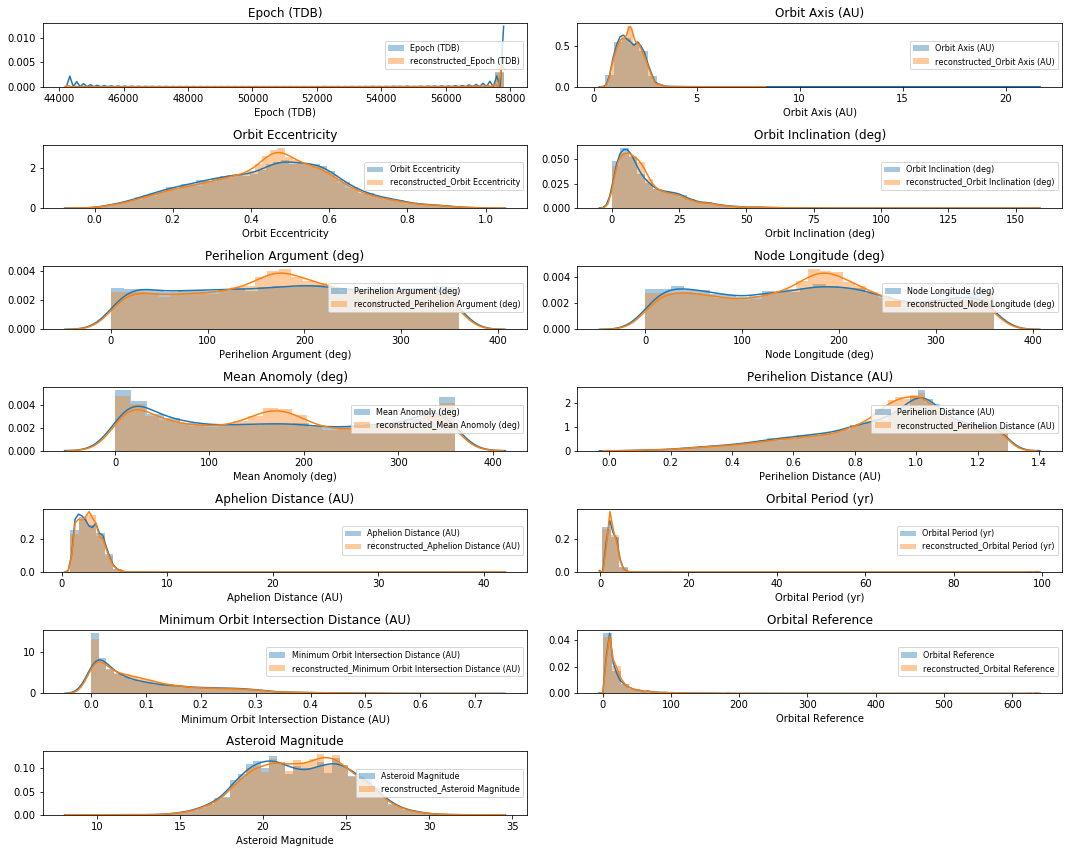

In [110]:
plot_hist(orbit, orbit_knn)

> ## SoftImpute

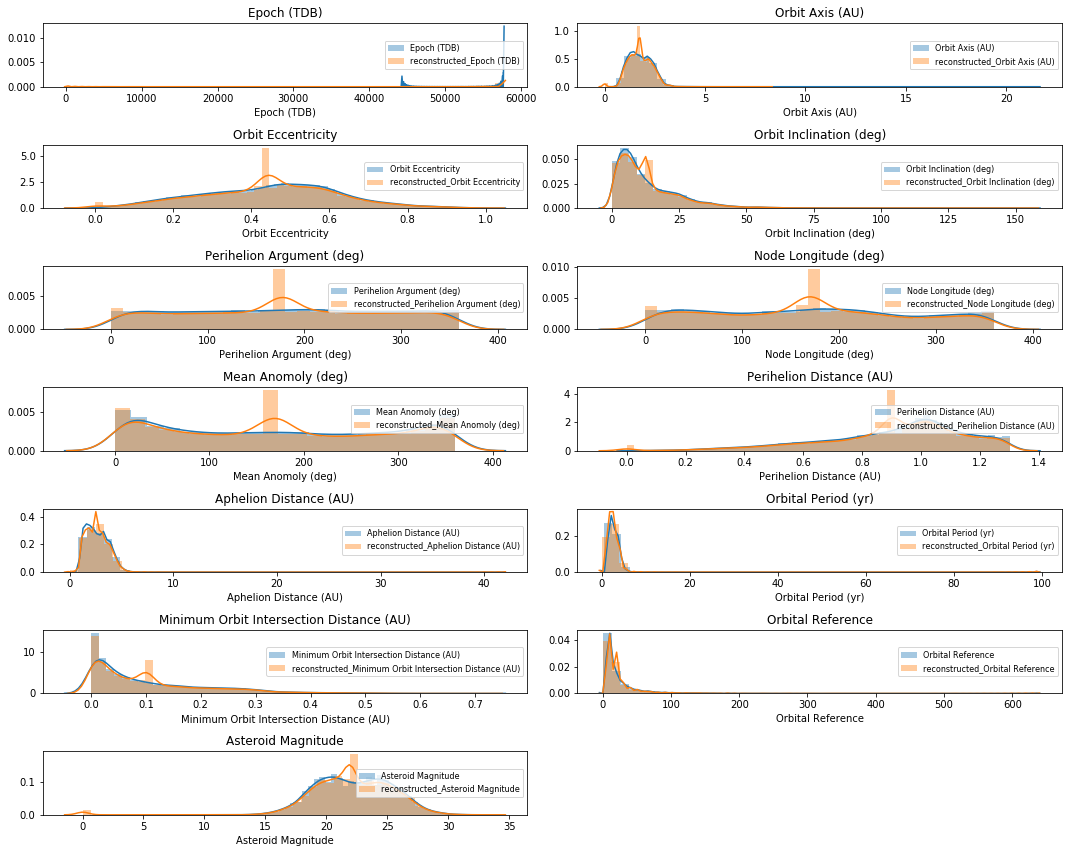

In [111]:
plot_hist(orbit, orbit_softImpute)



---
## AutoEncoder



In [10]:
orbit_missing.dropna().shape

(3197, 15)

Aún si eliminamos todas las filas en las que haya algún valor perdido, nos quedamos con suficientes ejempos como para intentar entrenar un modelo.

In [0]:
from sklearn.model_selection import train_test_split

# Obs: En este caso y_train/test va a ser una matriz con las mismas dimensiones que x_train/test
x_train, x_test, y_train, y_test = train_test_split(orbit_missing.dropna(), orbit_missing.dropna(), test_size = .30, random_state = 11235813)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = .30, random_state = 11235813)

En este caso, voy a preferir no escalar los datos.

In [29]:
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.constraints import maxnorm

simple_nn = Sequential()

simple_nn.add(Dropout(0.2,input_shape = (x_train.shape[1],)))
simple_nn.add(
    Dense(200,
         kernel_initializer = 'glorot_uniform',
         activation = 'relu',
         name = 'input_layer')
)
simple_nn.add(Dropout(0.2))

simple_nn.add(
    Dense(500,
         kernel_initializer = 'glorot_uniform',
         kernel_constraint=maxnorm(3),
         activation = 'relu',
         name = 'hidden_1')
)
simple_nn.add(Dropout(0.2))

simple_nn.add(
    Dense(100,
         kernel_initializer = 'glorot_uniform',
         kernel_constraint=maxnorm(3),
         activation = 'tanh',
         name = 'hidden_2')
)
simple_nn.add(Dropout(0.2))

simple_nn.add(
    Dense(100,
         kernel_initializer = 'glorot_uniform',
         kernel_constraint=maxnorm(3),
         activation = 'tanh',
         name = 'hidden_3')
)

simple_nn.add(Dropout(0.2))

simple_nn.add(
    Dense(500,
         kernel_initializer = 'glorot_uniform',
         kernel_constraint=maxnorm(3),
         activation = 'relu',
         name = 'hidden_5')
)


simple_nn.add(
    Dense(200,
         kernel_initializer = 'glorot_uniform',
         activation = 'relu',
         name = 'hidden_6')
)
simple_nn.add(
    Dense(x_train.shape[1], activation = 'linear', name = 'out')
)
simple_nn.summary()



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_49 (Dropout)         (None, 13)                0         
_________________________________________________________________
input_layer (Dense)          (None, 200)               2800      
_________________________________________________________________
dropout_50 (Dropout)         (None, 200)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 500)               100500    
_________________________________________________________________
dropout_51 (Dropout)         (None, 500)               0         
_________________________________________________________________
hidden_2 (Dense)             (None, 100)               50100     
_________________________________________________________________
dropout_52 (Dropout)         (None, 100)             

In [31]:
from keras.optimizers import Adam
from keras.callbacks import History

history_simple_nn = History()

simple_nn.compile(optimizer=Adam(), loss = 'mean_squared_error')

simple_nn.fit(x_train, y_train, epochs = 300, batch_size = 128, verbose = 1,
            callbacks=[history_simple_nn], validation_data=(x_val, y_val))

Train on 1920 samples, validate on 824 samples
Epoch 1/300
1920/1920 [==============================] - 2s 1ms/step - loss: 800395.4083 - val_loss: 145229.2765
Epoch 2/300
1920/1920 [==============================] - 0s 127us/step - loss: 723377.9292 - val_loss: 128130.7154
Epoch 3/300
1920/1920 [==============================] - 0s 125us/step - loss: 729572.5333 - val_loss: 107952.3353
Epoch 4/300
1920/1920 [==============================] - 0s 126us/step - loss: 688426.8333 - val_loss: 114297.7614
Epoch 5/300
1920/1920 [==============================] - 0s 128us/step - loss: 726809.9583 - val_loss: 109108.5300
Epoch 6/300
1920/1920 [==============================] - 0s 128us/step - loss: 699819.9958 - val_loss: 114735.8002
Epoch 7/300
1920/1920 [==============================] - 0s 128us/step - loss: 715906.5167 - val_loss: 110452.5769
Epoch 8/300
1920/1920 [==============================] - 0s 123us/step - loss: 720642.5208 - val_loss: 115541.9612
Epoch 9/300
1920/1920 [============

KeyboardInterrupt: ignored

In [0]:
loss_train_simple = history_simple_nn.history['loss']
loss_val_simple = history_simple_nn.history['val_loss']


In [0]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
print('Final loss (Validation): {0}'.format(loss_val[-1].round(4)))

fig,_ = plt.subplots(figsize = (16,8))
plt.title('MSE across training for 300 epoch', size = 20)
plt.xlabel('Epoch', size = 15)
plt.ylabel('Mean Absolute Error', size = 15)
plt.plot(range(1,301), loss_train_simple, '-', label = 'Train MSE');
plt.plot(range(1,301), loss_val_simple, '-', label = 'Validation MSE');
plt.legend();
sn.despine()
